# Import Libraries

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Load the dataset

In [14]:
df = pd.read_csv('customer_churn_data.csv')

# Data Analysis

In [15]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [16]:
df.shape

(1000, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [18]:
# Explore missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [19]:
df['InternetService'] = df['InternetService'].fillna('')

In [20]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [21]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [23]:
numeric_columns_data = df.select_dtypes(include=['number'])
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [24]:
# Check for correlation between numeric features
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [30]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [31]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [32]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [33]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [34]:
df.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

# Data Visualization

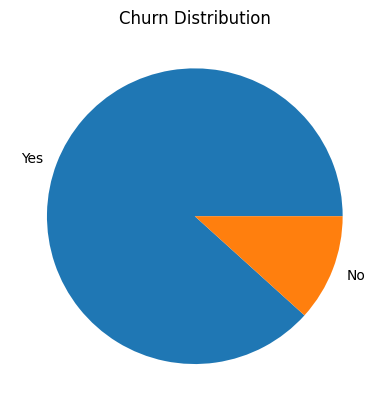

In [29]:
df["Churn"].value_counts().plot(kind='pie')
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

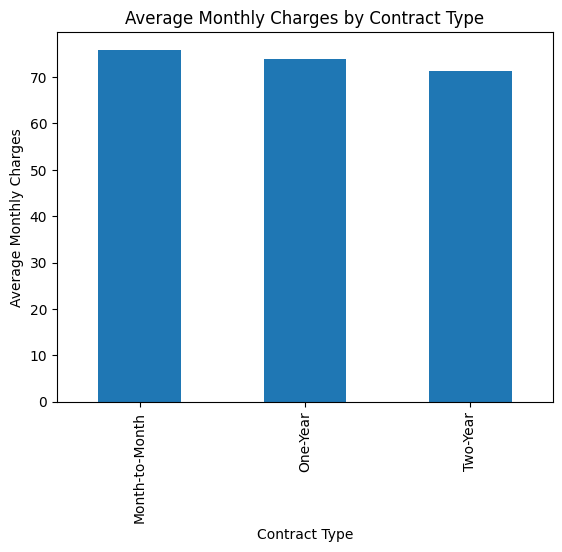

In [35]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.show()

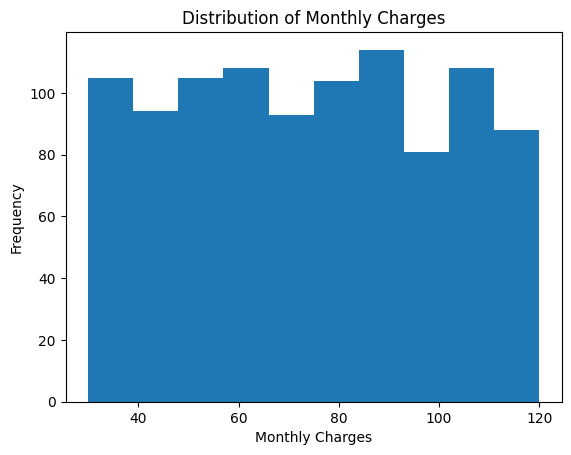

In [36]:
plt.hist(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

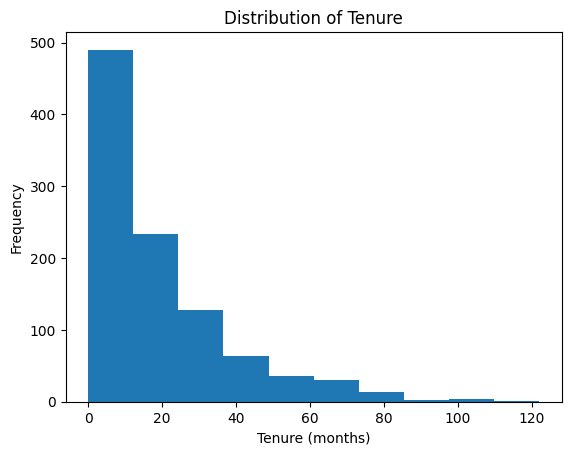

In [37]:
plt.hist(df["Tenure"])
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [38]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [47]:
y = df[['Churn']]
print(y)

    Churn
0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
..    ...
995   Yes
996   Yes
997   Yes
998   Yes
999   Yes

[1000 rows x 1 columns]


In [41]:
X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]
print(X)

     Age  Gender  Tenure  MonthlyCharges
0     49    Male       4           88.35
1     43    Male       0           36.67
2     51  Female       2           63.79
3     60  Female       8          102.34
4     42    Male      32           69.01
..   ...     ...     ...             ...
995   42    Male      41           37.14
996   62    Male       9           80.93
997   51  Female      15          111.72
998   39    Male      68           65.67
999   50    Male       1           56.67

[1000 rows x 4 columns]


In [ ]:
# Encode the gender column
# 1 for female, 0 for male
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_21636\142521163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [44]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [48]:
# 1 for Yes, 0 for No
y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_21636\891615573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [49]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [54]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [55]:
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled

array([[-0.27936177, -1.06725697,  2.28080878,  0.92037124],
       [ 0.02664838,  0.93698147,  0.11295321,  1.12221019],
       [-0.38136516, -1.06725697,  0.69457299, -1.00540975],
       ...,
       [ 0.23065515, -1.06725697,  1.91068709,  0.16723494],
       [ 0.02664838,  0.93698147, -0.36291753,  1.6909211 ],
       [-0.38136516,  0.93698147,  0.06007868, -0.87045469]],
      shape=(800, 4))

In [57]:
X_test_scaled

array([[ 0.53666531,  0.93698147, -0.99741184,  1.17603391],
       [ 0.94467885,  0.93698147, -0.89166279,  1.77798888],
       [-1.91141594, -1.06725697, -0.41579205,  1.7237694 ],
       [-0.58537193,  0.93698147,  0.37732584,  1.54251011],
       [-1.19739224, -1.06725697, -0.68016468, -0.76913946],
       [ 0.94467885, -1.06725697, -0.52154111, -0.79051064],
       [-0.99338547,  0.93698147,  0.74744752,  1.03276783],
       [-0.99338547, -1.06725697,  0.32445131, -1.56937151],
       [ 0.6386687 , -1.06725697,  0.06007868, -1.7114503 ],
       [-0.7893787 ,  0.93698147,  3.3382993 ,  0.93818056],
       [-0.48336854,  0.93698147, -0.99741184, -1.57768253],
       [ 0.02664838,  0.93698147,  0.21870226, -0.81465216],
       [ 0.84267547,  0.93698147, -0.94453732,  0.46089082],
       [-0.68737531,  0.93698147,  0.21870226,  1.59277197],
       [ 0.23065515,  0.93698147, -0.52154111, -1.68295539],
       [-0.89138208, -1.06725697, -0.25716848, -1.09247753],
       [ 0.12865177, -1.

# Build the model

## Logistic Regression

In [73]:
log_model = LogisticRegression()

In [74]:
log_model.fit(X_train_scaled, y_train['Churn'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# KNN

In [79]:
# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

In [80]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [81]:
gridkn.fit(X_train_scaled, y_train['Churn'])

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [82]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

## SVC

In [88]:
svm = SVC()

In [89]:
param_grid_svm = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [91]:
gridsvc = GridSearchCV(svm, param_grid_svm, cv=5)

In [92]:
gridsvc.fit(X_train_scaled, y_train['Churn'])

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [93]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Decision Tree

In [97]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [98]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

In [99]:
grid_tree.fit(X_train_scaled, y_train['Churn'])

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [100]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

## Random Forest

In [104]:
rfc_model = RandomForestClassifier()

In [105]:
param_grid = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}

In [106]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)


In [107]:
grid_rfc.fit(X_train_scaled, y_train['Churn'])

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [108]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

# Evaluate the model

## Logistic Regression

In [84]:
def model_performance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [75]:
y_pred = log_model.predict(X_test_scaled)

In [85]:
model_performance(y_pred)

Accuracy score on model is 0.885


## KNN

In [83]:
y_pred_gridkn = gridkn.predict(X_test_scaled)

In [86]:
model_performance(y_pred_gridkn)

Accuracy score on model is 0.88


## SVC

In [94]:
y_pred_gridsvc = gridsvc.predict(X_test_scaled)

In [95]:
model_performance(y_pred_gridsvc)

Accuracy score on model is 0.885


## Decision Tree

In [101]:
y_pred_gt = grid_tree.predict(X_test_scaled)

In [102]:
model_performance(y_pred_gt)

Accuracy score on model is 0.85


# Random Forest

In [109]:
y_pred_rfc = grid_rfc.predict(X_test_scaled)

In [110]:
model_performance(y_pred_rfc)

Accuracy score on model is 0.865


In [114]:
### Best model is SVC 
best_model = gridsvc.best_estimator_

In [115]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']